**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Good luck on the final sprint!

## Introduction

The gym chain **Model Fitness** is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
In order to fight churn, **Model Fitness** has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

### What is our task?
* Learn to predict the probability of churn (for the upcoming month) for each customer
* Draw up typical user portraits: select the most outstanding groups and describe their main features
* Analyze the factors that impact churn most
* Draw basic conclusions and develop recommendations on how to improve customer service:
* Identify target groups
* Suggest measures to cut churn
* Describe any other patterns you see with respect to interaction with customers

### Plan of Work:
* We are going to start with downloading and reading the data
* Second we'll carry an EDA on the data
* Third we'll build a model to predict user churn 
* Then we'll divide users into clusters with similar features
* Finally, conclusions and recommendations generally

## Initialization
We'll start as you would expect with loading the necessary libraries and datasets:

### Loading libraries

In [1]:
# loading all the libraries
import pandas as pd
from IPython.display import display
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Exploratory data analysis (EDA)

Below we'll carry an EDA to make sure our data is ready for studying for later.
Starting with **missing values**:

### Dealing with missing values

In [3]:
gym.columns = gym.columns.str.lower() # to make all column names in lower case
display(gym.sample(10))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3485,0,1,1,1,1,1,1,31,221.628498,1.0,4,1.699236,1.771071,0
2731,1,1,0,0,1,1,0,27,48.897909,1.0,5,2.011403,1.991824,0
2958,1,1,1,1,1,12,0,28,32.976388,12.0,9,3.366866,3.323171,0
1486,1,0,1,0,1,12,1,30,252.350136,9.0,4,2.591066,2.560133,0
1867,1,1,0,0,1,6,1,27,155.805686,6.0,5,2.066078,2.232919,0
1506,1,1,1,1,1,12,1,28,149.992923,7.0,1,2.296661,2.178301,0
3368,1,0,1,0,1,1,0,28,58.430242,1.0,1,1.151147,0.568508,1
1071,0,1,1,1,1,12,0,28,320.471993,8.0,2,1.282495,0.535976,1
1748,0,0,0,0,1,1,1,28,94.710368,1.0,3,2.461840,2.391254,0
3391,0,0,1,0,1,6,1,28,156.699392,6.0,2,0.382462,0.260833,0


In [4]:
display(gym.info())
display(gym.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

None

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
print("number of duplications:", gym.duplicated().sum())

number of duplications: 0


<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, the data was loaded and inspected!

</div>

Good start! No missing values were found. We have one full dataframe of 4000 rows.

**Next:** we'll take a look at each feature mean values while grouped by the 'churn' factor to see how it is divided:

### Churners vs Non-churners

In [6]:
# applying mean() to all columns grouped by churn (numerical and categorical)
gym_churn_grouped_num = gym.groupby(['churn'])['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'].mean()
gym_churn_grouped_cat = gym.groupby(['churn'])['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits'].mean()

print('Numeric features:')
display(gym_churn_grouped_num)
print("\nCategorical features:")
display(gym_churn_grouped_cat)

Numeric features:


,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,
0,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1.728558,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546



Categorical features:


,gender,near_location,partner,promo_friends,phone,group_visits
churn,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,0.464103
1,0.510839,0.768143,0.355325,0.183789,0.902922,0.268615


We've divided the churn grouped features data into two parts; numerical features and categorical features just for better readability. Categorical feature mean values will be between 1 and 0 since these feature can only have the value 0 (false) or 1 (true). On the other hand, numerical features can have any number as a value.

* Looking at the churn grouped dataframe of numerical features we can see that the feature values for customers that didn't churn (0) are higher than the feature values for customers that did churn. We can already tell that people with higher categotical feature values, like **contract period** or **average additional charges** are less likely to churn - **next month**.
* On the second churn grouped dataframe, as expected, we only see values between 1 and 0. To understand what we see, we are looking at averages, 1's and 0's summed then divided by the number of customers of each group. The value 0.5 means we had equal amount of 1's and 0's for this feature of this group. The ratios for each feature seem to be similar for those who churned and those who didn't - except maybe for **promo_friends** and **group_visits** features, we can see that we have higher ratio of customers who were signed up by a friend among non-churners, same goes for customers that used to take part in group visits.

### Churners vs Non-churners: distributions
Lets have a look at the distributions of feature values among churners and non-churners:

In [7]:
# making two seperate groups, churners vs non-churners
gym_stayers = gym[gym['churn'] == 0] # non-churners
gym_quiters = gym[gym['churn'] == 1] # churners

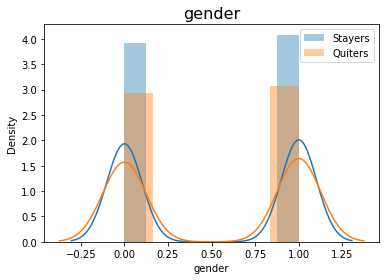

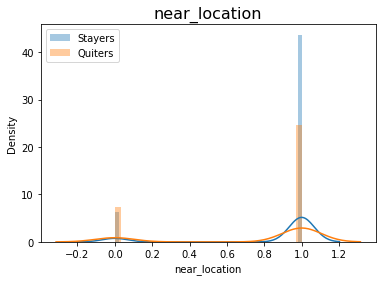

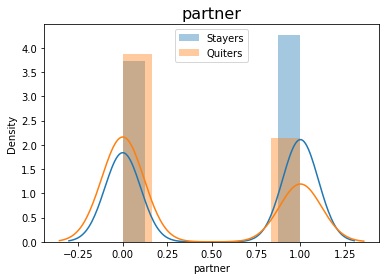

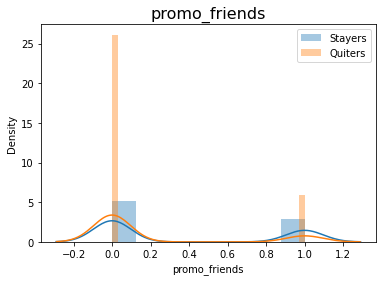

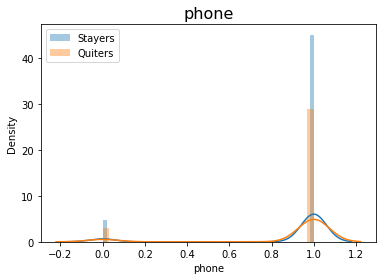

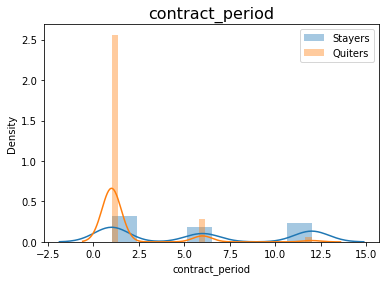

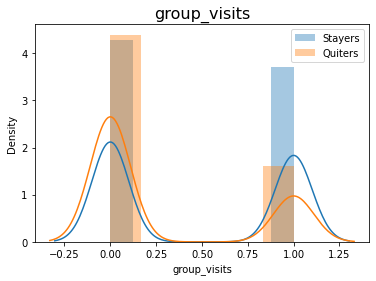

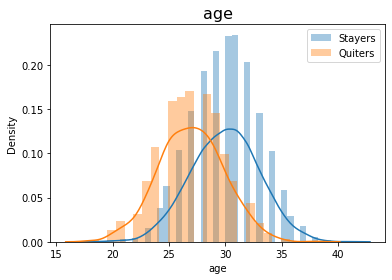

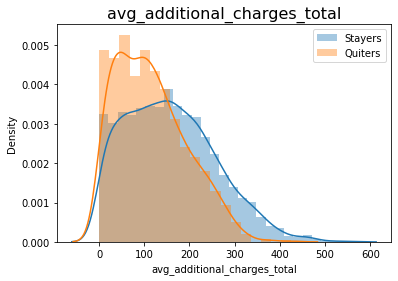

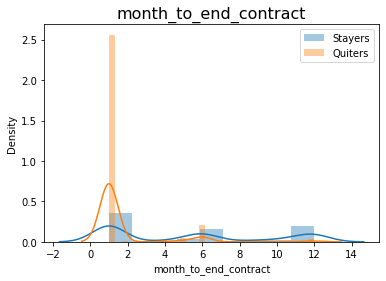

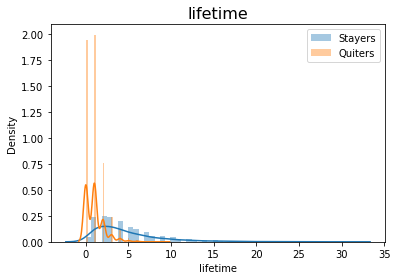

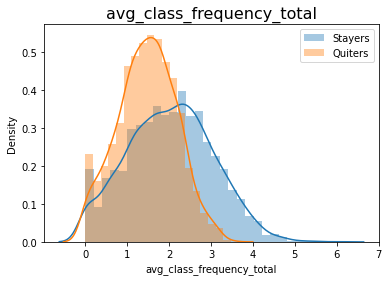

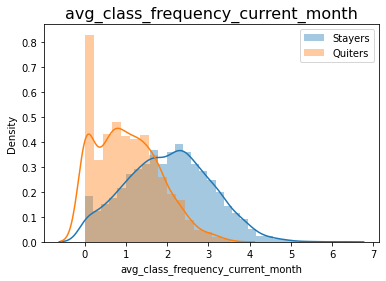

In [8]:
for col in gym.drop('churn', axis = 1).columns: # dropping the churn column then running a loop on the rest of the features
    sns.distplot(gym_stayers[col], label='Stayers')
    sns.distplot(gym_quiters[col], label='Quiters')
    plt.title(col, fontsize=16)
    plt.legend()
    plt.show()


What do we learn from the graphs above:
1. **Gender**: both genders have similar ratios for churners (quitters) and non-churners (stayers) leading to the conclusion that gender doesn't effect churn rates.
2. **Location**: among those who live or work near the to gym, we have more stayers (non-churners) and of those who live or work far from the gym we have more quitters (churners) - this means that location can be of effect on churn rates.
3. **Partner**: there's almost a 50/50 churn chance for customers that don't belong to a partner company, while on the other hand the churn chances for customers that belong to a partner company are much lower, almost at 65/35 (65% stayers, 35% quitters)
4. **Group visits**: same thing said above about **Partner** customers can be said about customers that used to go to group visits.
5. **Age**: Highest churn rates are among customers aging 25-30 while highest stay rates are among customers aging 30-35 - can age be a factor for churning?
6. **Average additional charges**: we can say that customers with low addition charges are slightly more likely to churn and customers with relatively high addition charges are slightly more likely to stay.
7. **Lifetime**: (Important) Seems like customers with the least **lifetime** at the gym are more likely to churn while customers with relatively high lifetime values are less likely to churn. Now this doesn't mean that customers with low lifetime values are certainly going to leave or customers with high lifetime values are certainly going to stay but what this says is that **Lifetime** is a very imporant factor on churn rates.
8. **Average class frequency**: same thing we said about **Average additional charges** can be said here.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good, you compared the two groups and made some useful observations!

</div>

Now that we have a better idea at the distribution of values for each and every feature, lets see how related each feature with on another. Do we need to drop some of the current features? From the distributions above we can see a couple, but lets take a look below:

### Interrelations between the features

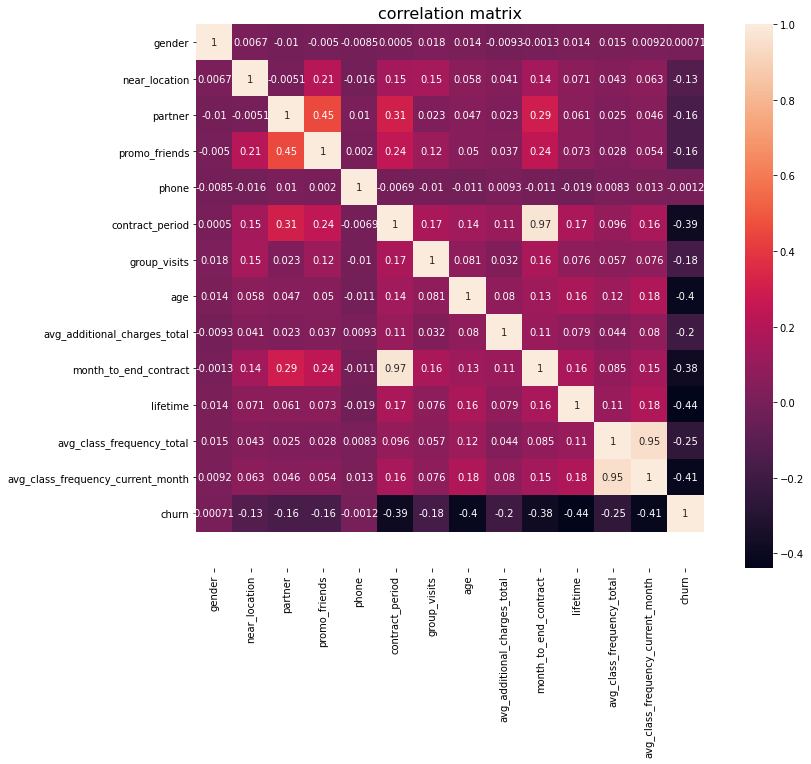

In [9]:
cm = gym.corr() # calculate correlation matrix
fig, ax = plt.subplots(figsize=(15,10))

# plot an annotated heatmap for the correlation matrix
sns.heatmap(cm, annot = True, square = True) 
ax.set_ylim(15, 0) # correcting "ragged" heatnap fields in the latest version of the library
plt.title('correlation matrix', fontsize=16)
plt.show()

We have found 4 dependant features which means we should be removing 2 of them to avoid confusing the predicting model later on - besides, features with such high dependency means we almost have the same feature twice among our features, that's why we have to remove them.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Makes sense!

</div>

In [10]:
gym = gym.drop(['avg_class_frequency_total', 'contract_period'], axis = 1) # dropping highly correlated features 
gym.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.000000,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.910244,0
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.736502,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.357215,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.120078,0


We've successfully removed 2 of the dependant features.

By that we can say that we've also successfully finished our EDA and we're ready to move on to the next part **Building churn prediciting model**, but before that, lets sum up everything we found out:

### Summary

* Among all the features that we have, we found out that **Location**, **Group visits**, **Average additional charges**, **Partner**, **Age** and **Lifetime** are what's mostly effecting churn rates.
* We also found out that **Average class frequency per month** and **Total average class frequency** are correlated to one another, as well as, **month to end contract** and **contract period** features, therefore we removed 2 of these features, 1 of each pair.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Well done!

</div>

## Building user churn predicition model

We are done with EDA and now its time to build a model to predict and forecast user churn.
Such model takes data and a target variable that we already have and using these two items it starts learning to predict which users may churn and which may not.

Lets start:

### Preparing the data

In [11]:
# divide the data into features (the X matrix) and a target variable (y)
X = gym.drop('churn', axis = 1)
y = gym['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # divide the data into train and test

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test sets

</div>

We're going to be testing two Classification models; **Random Forest** and **Logistic Regression** models.

We train our models using the train data and then test it on the test data. Once we have our results, we compare it with the target variable and see which model has less error.

In [12]:
# Logistic regression & Random forest
models = [LogisticRegression(random_state = 0), RandomForestClassifier(random_state = 0)]

In [13]:
# defining a function to calculate the error scores
def calculate_metrics(y_test, predictions):
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('F1 Score: {:.2f}'.format(f1_score(y_test, predictions)))    

In [14]:
# training the models then predicting 
for model in models:
    print(model) # to know what metrics is to what model
    model.fit(X_train, y_train) # train the model on train data
    probabilities = model.predict_proba(X_test)[:,1] # use the trained model to make forecasts
    predictions = model.predict(X_test) # binary prediction
    print(probabilities.mean())
    calculate_metrics(y_test, predictions) # print the mertic scores

LogisticRegression(random_state=0)
0.2573762821292067
Accuracy: 0.90
Precision: 0.79
Recall: 0.80
F1 Score: 0.79
RandomForestClassifier(random_state=0)
0.26542499999999997
Accuracy: 0.91
Precision: 0.83
Recall: 0.79
F1 Score: 0.81


### Refiting with a threshold
Since the data that we have isn't balanced, lets train our models again using the ratio of churners/non-churners as a threshold and see if we receive any better results:

In [15]:
# Lets train our model with a preset threshold
threshold = gym_quiters.shape[0]/gym_stayers.shape[0] # the percent of churners of non-churners
print(threshold)

0.36100714528751277


In [16]:
for model in models:
    print('\n', model) # to know what metrics is to what model
    model.fit(X_train, y_train) # train the model on train data
    probabilities = model.predict_proba(X_test)[:,1] # use the trained model to make forecasts
    predictions = [0 if i < threshold else 1 for i in probabilities]
    print(probabilities.mean())
    calculate_metrics(y_test, predictions) # print the mertic scores


 LogisticRegression(random_state=0)
0.2573762821292067
Accuracy: 0.89
Precision: 0.73
Recall: 0.85
F1 Score: 0.79

 RandomForestClassifier(random_state=0)
0.26542499999999997
Accuracy: 0.89
Precision: 0.74
Recall: 0.87
F1 Score: 0.80


### To sum up
At the first training session we got 0.79 F1 score for *Logistic Regression* and 0.81 F1 score for *Random Forest* meaning that *Random Forest* had slightly better results than his competitor.
When we added a threshold, precision overall got worse for both models while recall got better for both of them, yet Random Forest still had better F1 results. From the results above, it is recommended to use **Random Forest Classifier** in this case since it had slightly better results!

**Next**: we'll try to use **unsupervised machine learning** to try and learn more about the data we have - possibily find more features that affect churn rates.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The models were trained and evaluated correctly, it's nice that you tried tuning the threshold!

</div>

## Unsupervised ML

At this part, we'll use the K-means algorithm on a standardized matrix in order to divide our customers into clusters that share similar features. In return that may help us find which cluster is more **prone for churn** and what features these cluster share - **this leads us to features that may affect the churn rates**.

### K-Means algorithm

In [17]:
# normalizing and standardizing the data
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

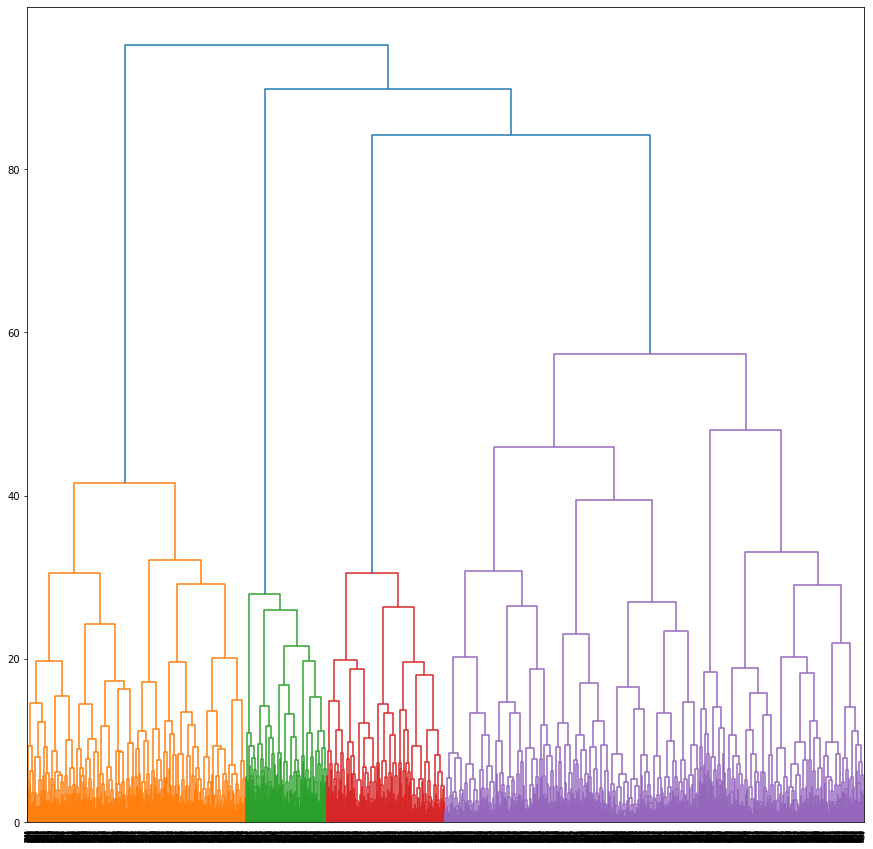

In [18]:
# linkage + dendrogram
lk_matrix = linkage(X_st, 'ward')
plt.figure(figsize = (15,15))
dendrogram(lk_matrix)
plt.show()

Our dendrogram shows that our customers can be divided into 4 main clusters. Lets continue:
Next we'll train our model using the K-means algorithm and 5 clusters (although we found out above that we have 4 main clusters but we were advised to use 5 clusters in the training)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!

</div>

In [19]:
km = KMeans(n_clusters = 5)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(X_st)

<div class="alert alert-warning">
<b>Reviewer's comment</b>

When using KMeans, it's a good idea to set the `random_state` parameter to make sure your research is reproducible: otherwise clusters can be slightly different every time we run the code due to random initialization

</div>

In [20]:
gym['cluster'] = labels
gym.iloc[0] # having a look at how a row might look like

gender                                1.00000
near_location                         1.00000
partner                               1.00000
promo_friends                         1.00000
phone                                 0.00000
group_visits                          1.00000
age                                  29.00000
avg_additional_charges_total         14.22747
month_to_end_contract                 5.00000
lifetime                              3.00000
avg_class_frequency_current_month     0.00000
churn                                 0.00000
cluster                               3.00000
Name: 0, dtype: float64

We successfully added the cluster column, the first customer belongs to cluser #2.

### Clusters' shared features

Lets have a look at the information we got, what does customers from each clusers have in common?

In [21]:
gym_grouped = gym.groupby('cluster').mean()
gym_grouped

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,
0,0.503319,0.993363,0.875000,0.658186,1.0,0.642699,30.329646,173.419804,8.902655,5.619469,2.245783,0.005531
1,0.484646,1.000000,0.935915,0.535381,1.0,0.257677,28.292390,127.191212,2.683578,2.651535,1.406706,0.368491
2,0.529622,1.000000,0.000000,0.054247,1.0,0.413276,29.084939,144.940112,2.797288,3.298358,1.728768,0.322627
3,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.723967,0.266839
4,0.498214,0.000000,0.487500,0.078571,1.0,0.233929,28.698214,137.520958,2.839286,3.019643,1.601681,0.401786


In [22]:
# features with categorical values
categrical_feats = gym[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn', 'cluster']]
# features with numerical values
numerical_feats = gym[['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month']]

Numeric Features:


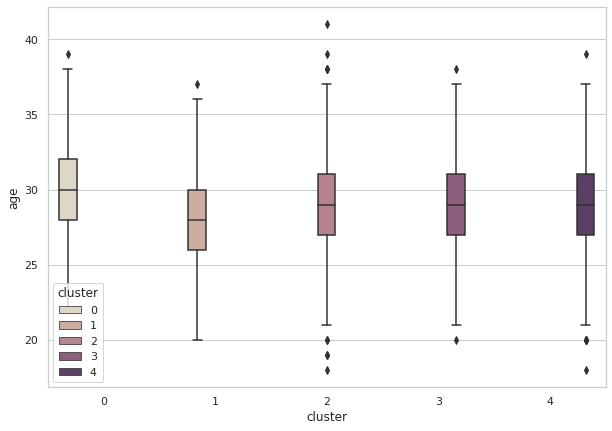

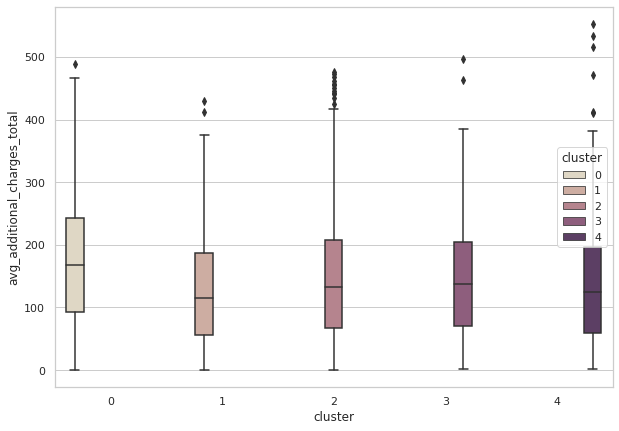

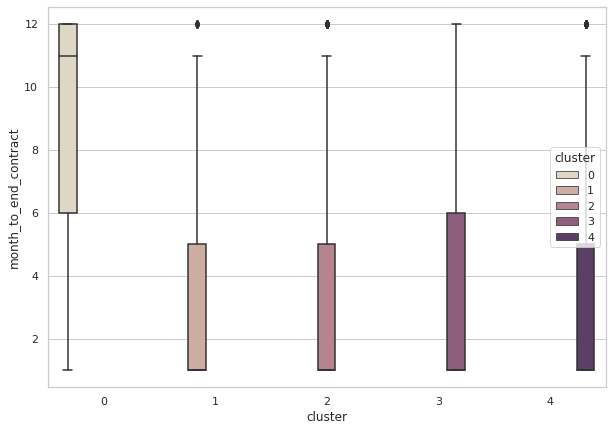

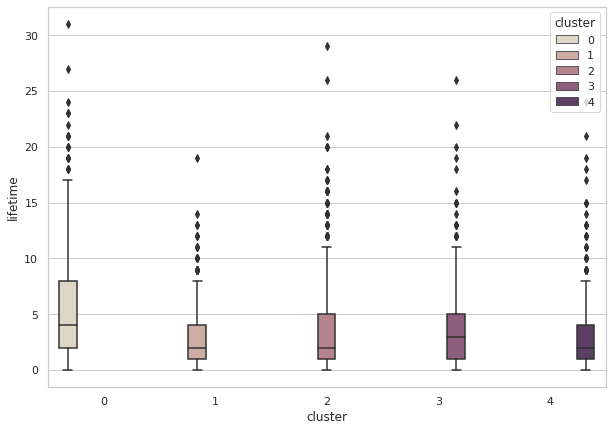

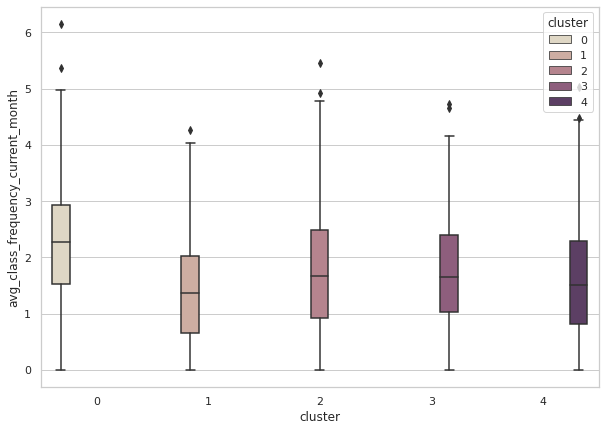

In [23]:
# Numeric features plots:
print("Numeric Features:")
for feature in numerical_feats.columns:
    plt.figure(figsize = (10,7))
    sns.color_palette("cubehelix")
    sns.set_theme(style="whitegrid")
    sns.boxplot(x = categrical_feats['cluster'], y = numerical_feats[feature], hue = categrical_feats['cluster'], palette = sns.color_palette("ch:s=-.2,r=.6"))
    plt.show()

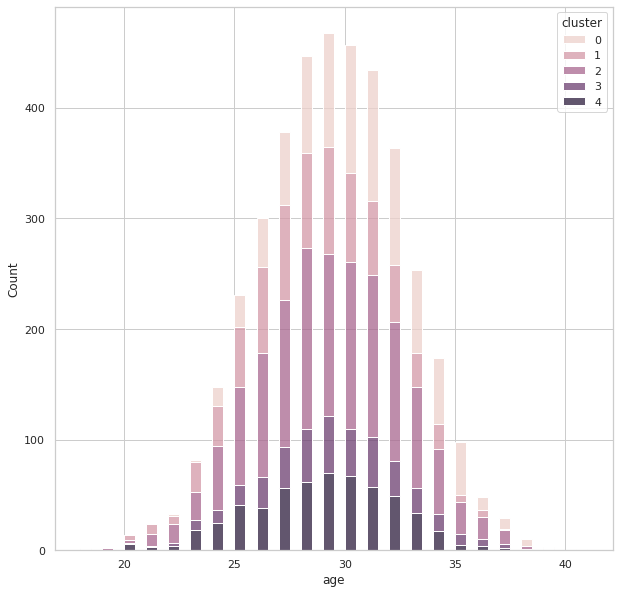

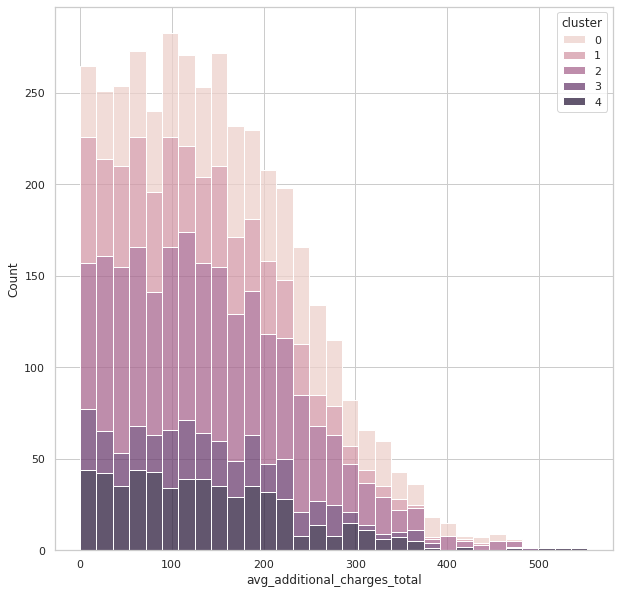

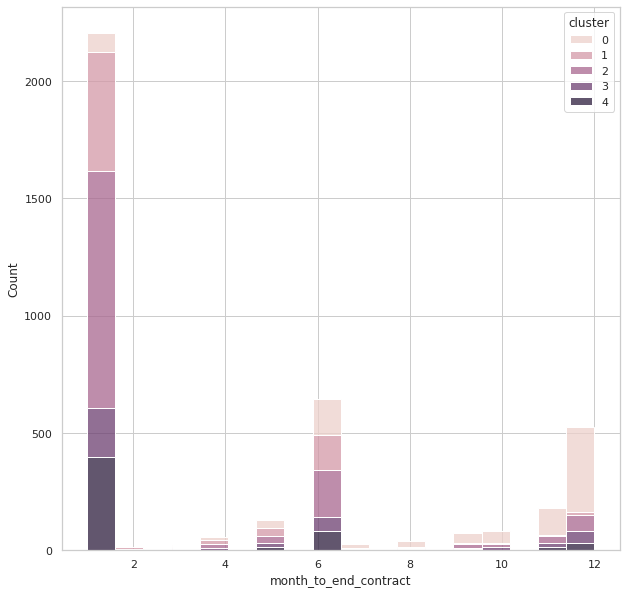

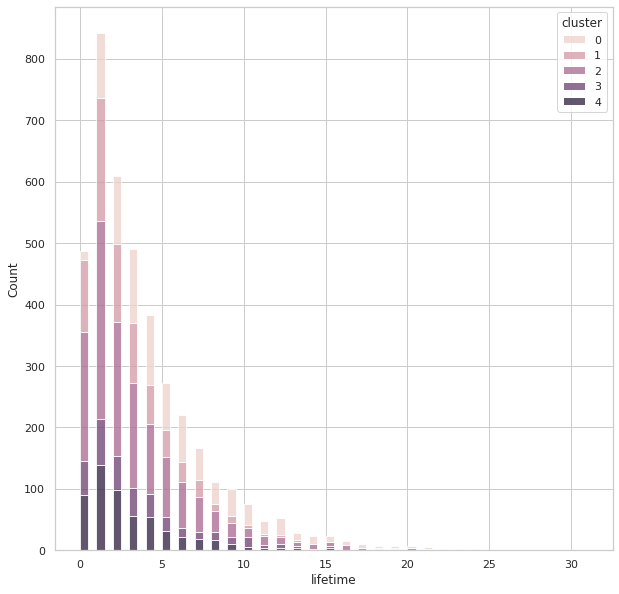

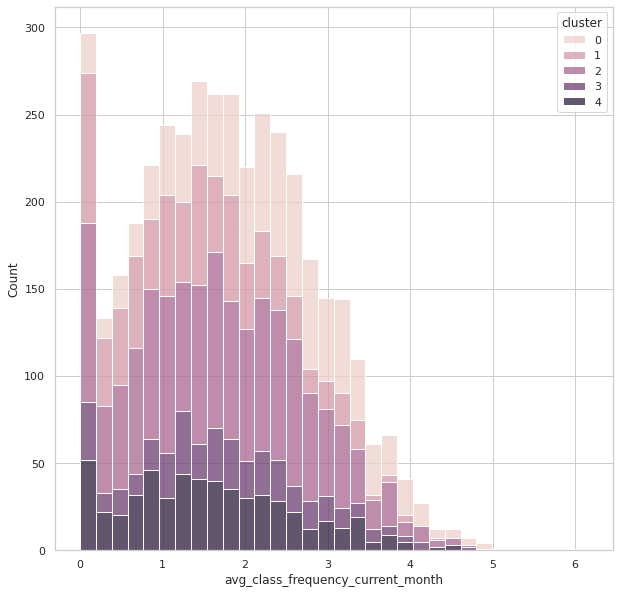

In [24]:
for feature in numerical_feats.columns:
    plt.figure(figsize = (10,10))
    sns.color_palette("cubehelix")
    sns.histplot(x = numerical_feats[feature], hue = categrical_feats['cluster'], multiple = 'stack', palette = sns.cubehelix_palette(as_cmap=True))
    plt.show()

Categorical Features:


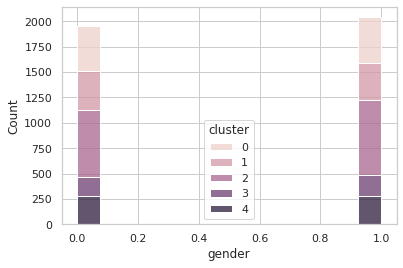

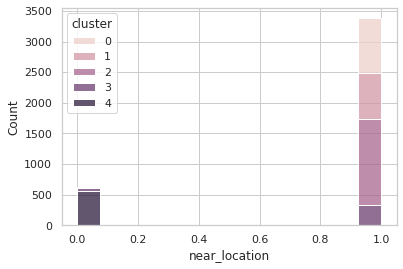

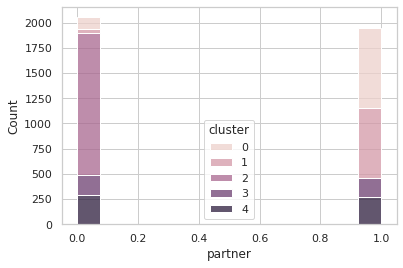

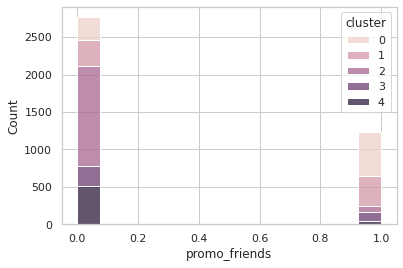

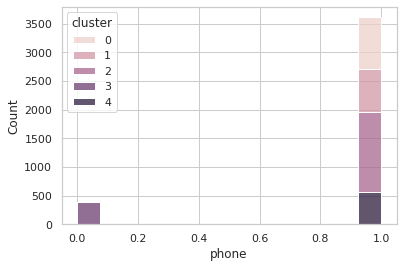

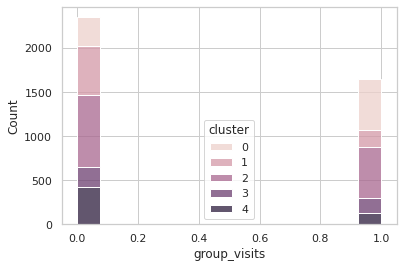

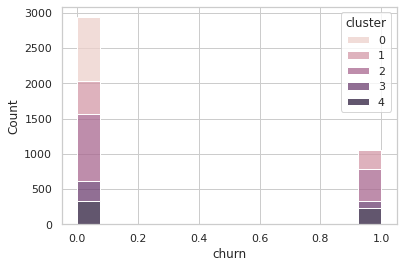

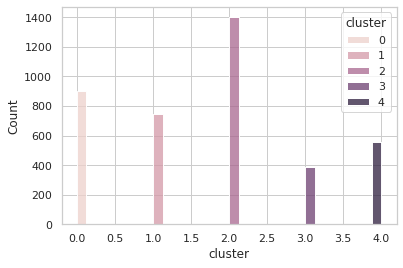

In [25]:
print("Categorical Features:")
for feature in categrical_feats.columns:
    sns.histplot(x = categrical_feats[feature], hue = categrical_feats['cluster'], cbar = True, multiple = 'stack')
    plt.show()

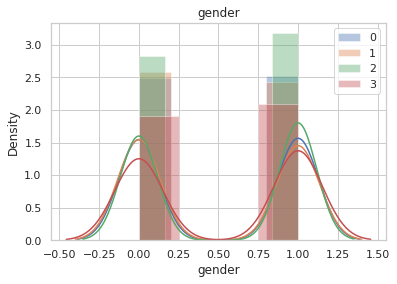

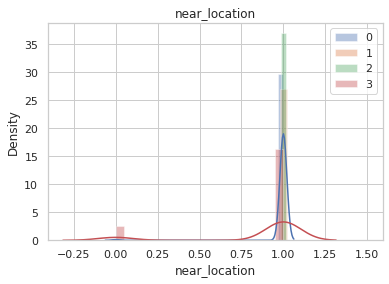

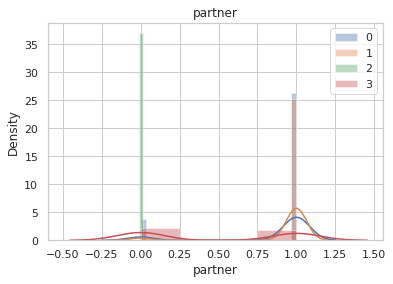

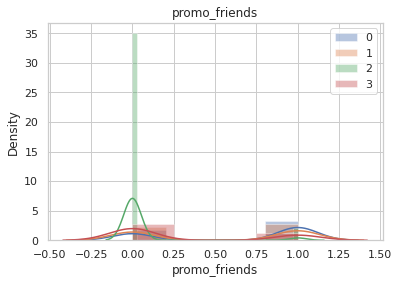

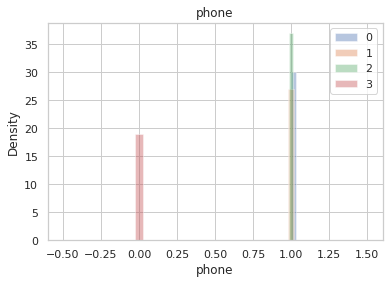

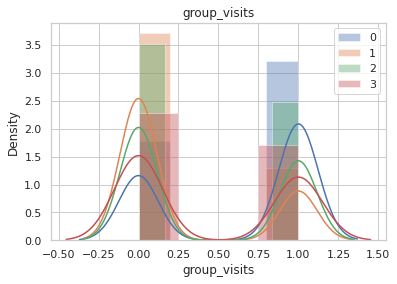

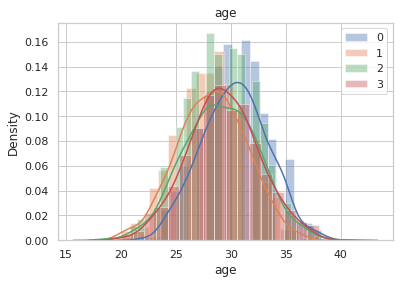

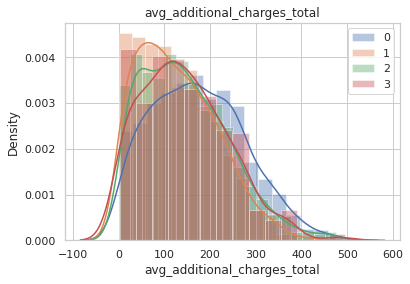

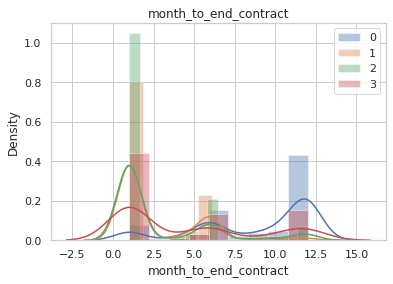

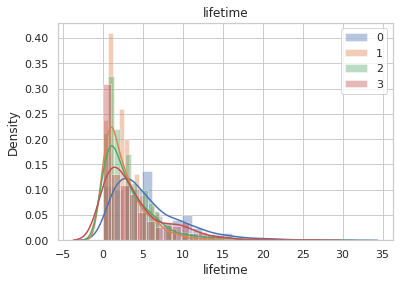

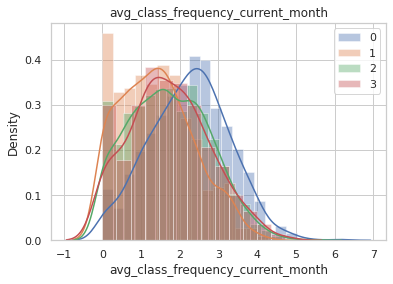

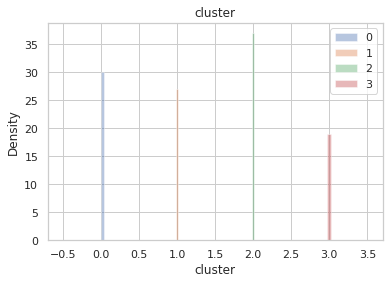

In [26]:
for feature in gym.drop('churn', axis = 1):
    for i in range(4):
        gym_cluster = gym[gym['cluster'] == i]
        sns.distplot(gym_cluster[feature], label = i)
    plt.title(feature)
    plt.legend()
    plt.show()

#### Summary

* Cluster 0: Includes customers with lowest values of most features such as; partner, age, additional charges and lifetime - meaning most customers of this cluster don't belong to a partner company, paid the least additional charges among all customers and have the least lifetime as well. What else do they share? High churn rates.
* Cluster 1: This is very easy, cluster 1 has only customers that do not live or work near the gym. As we would've expected, the churn rates aren't low here.
* Cluster 2: This cluster includes only customers that didn't sign-up with their phone numbers to the gym. A big chunk of them live or work near the gym and the churn rates aren't as high as C1 and C0.
* Cluster 3: Customers that belong to C3 are among the customers that haven't been signed up by a friend, have the highest additional charges paid and have the lowest churn rates among all the other groups.
* Cluster 4: This cluster includes mostly customers that belong to a partner company and have the highest values for lifetime feature. This cluser churn rates is among the lowest.

In [27]:
gym_grouped_churn = gym.groupby('cluster')['churn'].mean().reset_index()
gym_grouped_churn

,cluster,churn
0,0,0.005531
1,1,0.368491
2,2,0.322627
3,3,0.266839
4,4,0.401786


As explained above, Cluster 0 has the highest churn rates of 58%, then comes Cluster 1 with 40.3% followed by Cluster 2 with 26.6% churn rate, Cluster 4 with 11.5% and finally Cluster 3 with 1.9% churn rate - This is pretty low!

In [28]:
gym_grouped_churn = gym_grouped_churn.sort_values('churn', ascending = False).reset_index(drop=True)
print("PRONE TO LEAVING")
for i in gym_grouped_churn[['cluster', 'churn']].index:
    print('Cluster', gym_grouped_churn.iloc[i,0],'{:.2%}'.format(gym_grouped_churn.iloc[i,1]))
print("   MOST LOYAL")


PRONE TO LEAVING
Cluster 4 40.18%
Cluster 1 36.85%
Cluster 2 32.26%
Cluster 3 26.68%
Cluster 0 0.55%
   MOST LOYAL


<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good, you successfully identified the clusters and studied them!

</div>

## General Summary

*Here is the general summary and some recommendations:*

1. We found out that customers with low **group visits**, **lifetime** and **additional total charges paid** values are more prone to churn than other customers. Thus, we recommend the GYM team to get involved more with those customers and show them more attention in real-time. - if possible. Caring and giving attention to your customers may give them the feeling that they matter and they are being cared for which may lead to more involvement in their behalf. Once those customers have a higher lifetime in the gym and have spent more additional charges, they will be less likely to churn!

2. Customers that belong to a partner company are less likely to churn - maybe their loyality is derived from their loyality to their company (your partner) or maybe due to the discounts they may get - possibly for both reasons. We recommend you to get the GYM more **partners** and ask your partners to advertise more about your gym, this way you will be getting much more customers that belong to a **partner** and they are less prone to churn!

3. This may be extreme recommendation - but, a very high percent of customers that churn live or work far from the GYM - making it harder for them to reach the GYM, this would demotivate the  customers to come and will cause them to churn. We mentioned that this may be extreme, why? because the solution to this would be opening another GYM close to those customers. But you probably don't want to go that extreme, maybe offer those customers something other gyms doesn't offer them? This would motivate them to keep coming - free shakes, yeeha!

4. Customers that don't sign-up their phone numbers tend to churn more than those who sign-up with their phone numbers. Easy solution, make sure to pursue every customer to sign-up with their phone number and you'll have less churns!

5. Finally, we've noticed that customers between ages 25-30 tend to churn more than all other ages while ages from 30-35 tend to **stay** more than all other ages. You may want to keep an eye on there metrics, what could possibly be the reason?

We hope the recommendation we offered you are sane and reasonable, and we hope that by following them, or some of them, the churn rates would drastically get lower!

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent, your recommendations are based on the data and make a lot of sense. Good job!

</div>